In [1]:
import geopandas as gp
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.io.img_tiles as cimgt
%matplotlib inline

ModuleNotFoundError: No module named 'cartopy'

In [3]:
shapefile = 'data/Carney Island_Geo.shp'
df = gp.read_file(shapefile, encoding='UTF-8')
df.head(3)

,Name,descriptio,timestamp,begin,end,altitudeMo,tessellate,extrude,visibility,drawOrder,icon,gid,surface,geometry
0,None,None,None,None,None,None,-1,0,-1,None,None,89.0,land,POLYGON Z ((-122.810250262003 -74.353440079319...


In [4]:
df['Area'] = 1
df_new = df[['Name', 'Area', 'geometry']]
df_new.crs

{'init': 'epsg:4326'}

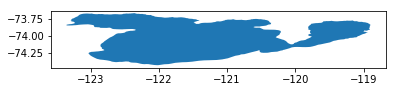

In [5]:
df_new.plot(figsize=(6,6));

In [6]:
df_albers = df_new.to_crs(crs='Proj4: +proj=aea +lat_1=-80 +lat_2=-60 +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs')
df_albers['Area'] = df_albers.area / 1000000.00
df_albers.round(decimals=3)

,Name,Area,geometry
0,None,6415.001,POLYGON Z ((-1682878.00155702 -10108178.813785...


In [7]:
df_albers.crs

'Proj4: +proj=aea +lat_1=-80 +lat_2=-60 +lat_0=0 +lon_0=0 +x_0=0 +y_0=0 +datum=WGS84 +units=m +no_defs'

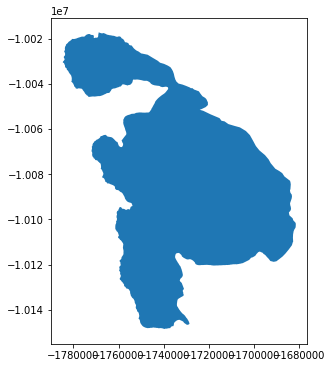

In [8]:
df_albers.plot(figsize=(6,6));

In [9]:
df_geo = df_albers.to_crs(epsg=4326)
df_geo.crs

{'init': 'epsg:4326', 'no_defs': True}

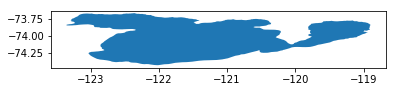

In [10]:
df_geo.plot(figsize=(6,6));

In [11]:
df_geo.to_file('data/Carney Island_Geo_clean.shp')

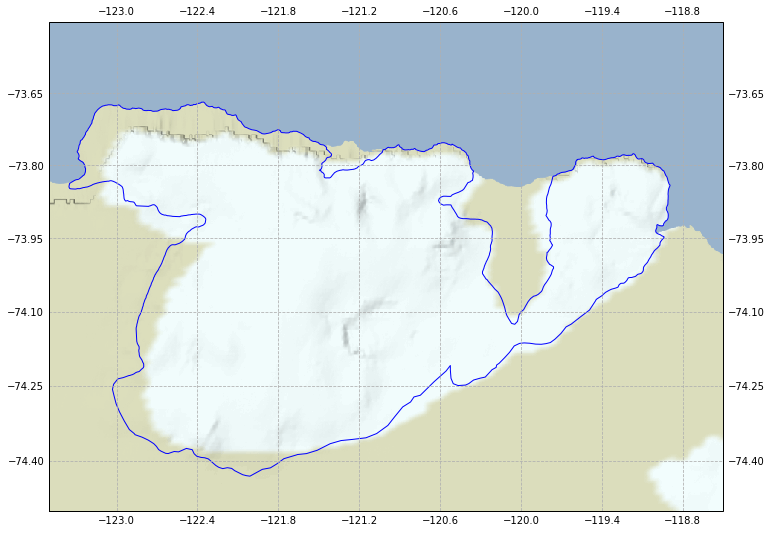

In [21]:
df_new = df_albers.to_crs(epsg=3785)
stamen_terrain = cimgt.Stamen('terrain-background') # [Terrain、Toner、Watercolor]
fig = plt.figure(figsize=(14,9))
ax = fig.add_subplot(1, 1, 1, projection=stamen_terrain.crs)
ax.set_extent([-123.5,-118.5,-74.5,-73.5], crs=ccrs.PlateCarree())
ax.add_image(stamen_terrain, 8)
ax.gridlines(draw_labels=True, linestyle='--');
df_new.plot(ax=ax, edgecolor='blue', facecolor='None');

In [ ]:
plt.savefig('data/Carney Island_Geo.png', format='PNG', dpi=300)